# Cena samochodu

Dane pochodzą z https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv i dotyczą one sprzedaży samochodów. Celem projektu jest wyestymowanie ceny samochodu w zależności od jego parametrów.

In [2]:
import numpy as np
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
#import sys
#!{sys.executable} -m pip install tensorflow

In [399]:
df = pd.read_csv("C:\\Users\\MakuTSW\\PycharmProjects\\Car details v3.csv")
df.info

<bound method DataFrame.info of                               name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission  

# Przetwarzanie danych.
Zajmijmy się wstępną obróbką danych. Najpierw usuniemy niepoprawne wiersze. Następnie zdecydujemy, jakie kolumny mogą zawierać wartościowe informacje.

# Problem brakujących danych.
Część z kolumn ma nieznaczną ilość pustych wartości.

In [400]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [401]:
df[df["max_power"].isnull()]["engine"].isnull().sum()

215

In [402]:
df[df["mileage"].isnull()]["engine"].isnull().sum()

221

In [403]:
df[df["torque"].isnull()]["engine"].isnull().sum()

221

We wszystkich przypadkach, kiedy brakuje wartości "torque", brakuje również "engine", "mileage","seats" i "max_power". Aby nie zmniejszyć rzetelności danych, dane te zostaną pominięte.

In [404]:
df = df[df["torque"].notna()]

In [405]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

# Analiza danych
Przeanalizujmy kolumny

In [406]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [407]:
df.shape

(7906, 13)

Zamieniamy kolumny na typ numeryczny by móc je łatwiej analizować.

In [408]:
df.loc[df['fuel'] == 'Diesel', 'fuel'] = 1
df.loc[df['fuel'] == 'Petrol', 'fuel'] = 2
df = df[~df['fuel'].isin(['CNG','LPG'])]
df['fuel'] = pd.to_numeric(df['fuel'])

c:\python\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [409]:
df.loc[df['seller_type'] == 'Individual', 'seller_type'] = 1
df.loc[df['seller_type'] == 'Dealer', 'seller_type'] = 2
df = df[~df['seller_type'].isin(['Trustmark Dealer'])]
df['seller_type'] = pd.to_numeric(df['seller_type'])

In [410]:
def func(x):
    a,b = x
    return a

a = df['max_power'].map(lambda x: x.split(' '))
df['max_power'] = a.apply(func)
df['max_power'] = pd.to_numeric(df['max_power'])

In [411]:
def func(x):
    a,b = x
    return a

a = df['engine'].map(lambda x: x.split(' '))
df['engine'] = a.apply(func)
df['engine'] = pd.to_numeric(df['engine'])

In [412]:
def func(x):
    a,b = x
    return a

a = df['mileage'].map(lambda x: x.split(' '))
df['mileage'] = a.apply(func)
df['mileage'] = pd.to_numeric(df['mileage'])

In [413]:
df.loc[df['owner'] == 'First Owner', 'owner'] = 1
df.loc[df['owner'] == 'Second Owner', 'owner'] = 2
df.loc[df['owner'] == 'Third Owner', 'owner'] = 3
df.loc[df['owner'] == 'Fourth & Above Owner', 'owner'] = 3
df.loc[df['owner'] == 'Test Drive Car', 'owner'] = 1
df['owner'] = pd.to_numeric(df['owner'])

In [414]:
df.loc[df['transmission'] == 'Manual', 'transmission'] = 0
df.loc[df['transmission'] == 'Automatic', 'transmission'] = 1
df['transmission'] = pd.to_numeric(df['transmission'])

Zamieniamy rok produkcji na wiek samochodu.

In [415]:
df['age'] = 2021 - df['year']
df.drop(['year'],axis = 1,inplace = True)

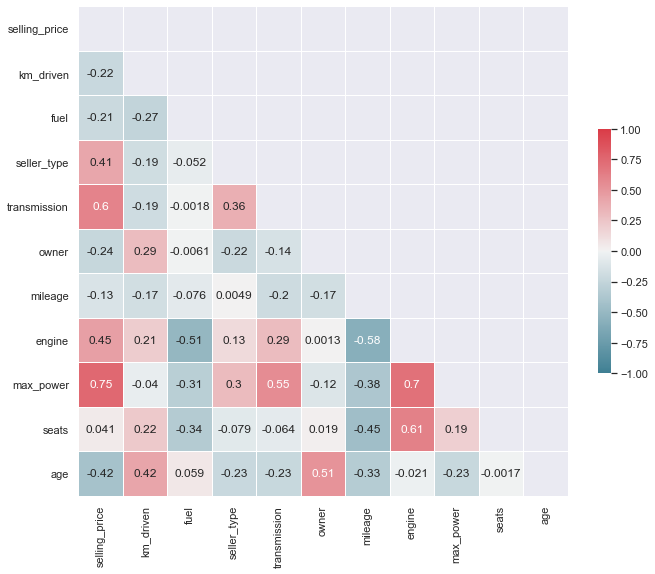

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
selling_price,1.000000,-0.224771,-0.210946,0.406856,0.599957,-0.241767,-0.125355,0.449497,0.746710,0.041375,-0.415045
km_driven,-0.224771,1.000000,-0.265385,-0.186844,-0.190562,0.290903,-0.174522,0.207200,-0.040127,0.224385,0.419600
fuel,-0.210946,-0.265385,1.000000,-0.051921,-0.001756,-0.006104,-0.076152,-0.514176,-0.308713,-0.342623,0.058583
seller_type,0.406856,-0.186844,-0.051921,1.000000,0.363168,-0.217968,0.004901,0.127186,0.300398,-0.079116,-0.225701
transmission,0.599957,-0.190562,-0.001756,0.363168,1.000000,-0.143225,-0.195369,0.289673,0.552501,-0.063682,-0.232274
owner,-0.241767,0.290903,-0.006104,-0.217968,-0.143225,1.000000,-0.172654,0.001300,-0.115530,0.018527,0.508549
mileage,-0.125355,-0.174522,-0.076152,0.004901,-0.195369,-0.172654,1.000000,-0.578968,-0.375190,-0.451109,-0.333253
engine,0.449497,0.207200,-0.514176,0.127186,0.289673,0.001300,-0.578968,1.000000,0.700802,0.613593,-0.021385
max_power,0.746710,-0.040127,-0.308713,0.300398,0.552501,-0.115530,-0.375190,0.700802,1.000000,0.191430,-0.229782
seats,0.041375,0.224385,-0.342623,-0.079116,-0.063682,0.018527,-0.451109,0.613593,0.191430,1.000000,-0.001686


In [416]:
sns.set(style="darkgrid")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)
plt.show()
corr

Na podstawie zależności usuniemy "seats" "torque", "mileage","owner","name","fuel".

In [417]:
df = df.drop(columns = ["seats","torque","name","mileage","owner","name","fuel"])

In [248]:
df['brand'] = df['name'].str.split(' ').str.get(0)
df.drop(['name'],axis=1,inplace=True)

# Modele

In [456]:
df_model = pd.get_dummies(data = df, drop_first=True)

In [457]:
X = df_model.drop(['selling_price'],axis=1)
y = df_model['selling_price']

In [458]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,random_state=0)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (1516, 6)
x test:  (6067, 6)
y train:  (1516,)
y test:  (6067,)


In [459]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

r2_train_scores = []
r2_test_scores = []
cv_mean = []

def car_price_prediction_model(model):
    model.fit(X_train, y_train)
    
    #R2 score of training set
    y_train_pred = model.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
    r2_train_scores.append(round(r2_train,2))
    
    #R2 score of test set
    y_test_pred = model.predict(X_test)
    r2_test = r2_score(y_test, y_test_pred)
    r2_test_scores.append(round(r2_test,2))
    
    # CV score of training set
    cv_training = cross_val_score(model, X_train, y_train, cv=5)
    cv_mean_training = cv_training.mean()
    cv_mean.append(round(cv_mean_training,2))
    
    # Printing each score
    print("Training set R2 scores: ",round(r2_train,2))
    print("Test set R2 scores: ",round(r2_test,2))
    print("Training cross validation score: ", cv_training)
    print("Training cross validation mean score: ",round(cv_mean_training,2))
    
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_train_pred),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_pred')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_test_pred)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

Training set R2 scores:  0.68
Test set R2 scores:  0.67
Training cross validation score:  [0.58607082 0.67675629 0.69910563 0.70071427 0.66811275]
Training cross validation mean score:  0.67


c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


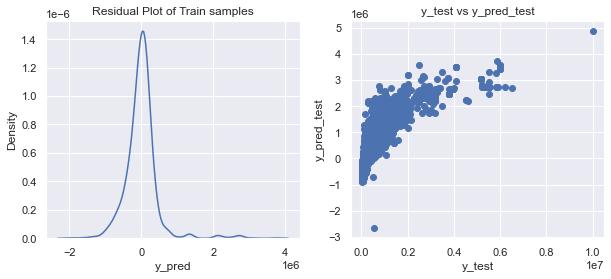

In [460]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
car_price_prediction_model(lm)

Training set R2 scores:  0.68
Test set R2 scores:  0.67
Training cross validation score:  [0.58604226 0.67675548 0.6989482  0.70071449 0.66816304]
Training cross validation mean score:  0.67


c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


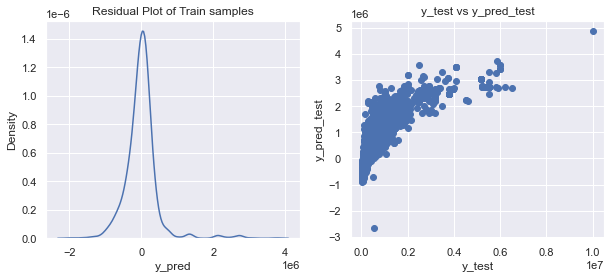

In [461]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

rg = Ridge()
alpha = np.logspace(-3,3,num=14)
rg_rs = RandomizedSearchCV(estimator=rg, param_distributions=dict(alpha=alpha))
car_price_prediction_model(rg_rs)

In [462]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed,shuffle=True)

In [447]:
pipeline1 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression(n_jobs=-1))])

param_grid1 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.01, 0.1, 1, 10, 100,1000]
}

grid_1 = GridSearchCV(pipeline_4, param_grid_4, cv=kfold, return_train_score=True) 
grid_1.fit(X_train, y_train)
grid_1.best_params_

c:\python\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'classifier__C': 100, 'preprocessing': StandardScaler()}

In [395]:
pipeline_2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', DecisionTreeClassifier())])

param_grid_2 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [1, 3, 5, 10, 50,100],
            'classifier__max_leaf_nodes': [None, 5, 10, 20, 50, 100],
}

grid_2 = GridSearchCV(pipeline_7, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

c:\python\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'classifier__max_depth': 100,
 'classifier__max_leaf_nodes': None,
 'preprocessing': None}

In [357]:
from sklearn import svm
from sklearn.svm import SVC
svc = svm.SVC('')
svc.fit(X_train,y_train)

print("Accuracy on training set: {:.10f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.10f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.0336411609
Accuracy on test set: 0.0265370035


In [396]:
tree = DecisionTreeClassifier(max_depth=100, max_leaf_nodes=None)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.10f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.10f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.9815303430
Accuracy on test set: 0.1191692764


# Sieci Nueronowe

In [464]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_var = ['selling_price','km_driven', 'engine', 'max_power', 'age','seller_type']
df_model[num_var] = scaler.fit_transform(df_model[num_var])

In [465]:
from sklearn.model_selection import train_test_split

X = df_model.drop(['selling_price'],axis=1)
y = df_model['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1516, 6) (1516,)
(6067, 6) (6067,)


In [466]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
from keras import backend

backend.clear_session()

history = History()

model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               700       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 5,801
Trainable params: 5,801
Non-trainable params: 0
_________________________________________________________________


In [467]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mse'])
history = model.fit(X_train, y_train, validation_data= (X_test, y_test),epochs=300)

Epoch 1/300
48/48 [==============================] - 1s 9ms/step - loss: 1.0764 - mse: 1.0764 - val_loss: 1.0016 - val_mse: 1.0016
Epoch 2/300
48/48 [==============================] - 0s 4ms/step - loss: 0.7431 - mse: 0.7431 - val_loss: 0.9713 - val_mse: 0.9713
Epoch 3/300
48/48 [==============================] - 0s 4ms/step - loss: 0.9513 - mse: 0.9513 - val_loss: 0.8684 - val_mse: 0.8684
Epoch 4/300
48/48 [==============================] - 0s 4ms/step - loss: 0.8081 - mse: 0.8081 - val_loss: 0.7517 - val_mse: 0.7517
Epoch 5/300
48/48 [==============================] - 0s 4ms/step - loss: 0.8927 - mse: 0.8927 - val_loss: 0.7062 - val_mse: 0.7062
Epoch 6/300
48/48 [==============================] - 0s 4ms/step - loss: 0.6593 - mse: 0.6593 - val_loss: 0.6876 - val_mse: 0.6876
Epoch 7/300
48/48 [==============================] - 0s 4ms/step - loss: 0.6227 - mse: 0.6227 - val_loss: 0.6782 - val_mse: 0.6782
Epoch 8/300
48/48 [==============================] - 0s 5ms/step - loss: 0.6594 - m

48/48 [==============================] - 0s 4ms/step - loss: 0.5313 - mse: 0.5313 - val_loss: 0.6537 - val_mse: 0.6537
Epoch 64/300
48/48 [==============================] - 0s 4ms/step - loss: 0.5735 - mse: 0.5735 - val_loss: 0.6536 - val_mse: 0.6536
Epoch 65/300
48/48 [==============================] - 0s 4ms/step - loss: 0.5788 - mse: 0.5788 - val_loss: 0.6535 - val_mse: 0.6535
Epoch 66/300
48/48 [==============================] - 0s 4ms/step - loss: 0.5033 - mse: 0.5033 - val_loss: 0.6538 - val_mse: 0.6538
Epoch 67/300
48/48 [==============================] - 0s 5ms/step - loss: 0.5871 - mse: 0.5871 - val_loss: 0.6538 - val_mse: 0.6538
Epoch 68/300
48/48 [==============================] - 0s 4ms/step - loss: 0.6234 - mse: 0.6234 - val_loss: 0.6535 - val_mse: 0.6535
Epoch 69/300
48/48 [==============================] - 0s 3ms/step - loss: 0.6373 - mse: 0.6373 - val_loss: 0.6536 - val_mse: 0.6536
Epoch 70/300
48/48 [==============================] - 0s 4ms/step - loss: 0.6078 - mse: 0

Epoch 125/300
48/48 [==============================] - 0s 4ms/step - loss: 0.7388 - mse: 0.7388 - val_loss: 0.6529 - val_mse: 0.6529
Epoch 126/300
48/48 [==============================] - 0s 4ms/step - loss: 0.6531 - mse: 0.6531 - val_loss: 0.6529 - val_mse: 0.6529
Epoch 127/300
48/48 [==============================] - 0s 3ms/step - loss: 0.6262 - mse: 0.6262 - val_loss: 0.6529 - val_mse: 0.6529
Epoch 128/300
48/48 [==============================] - 0s 3ms/step - loss: 0.6096 - mse: 0.6096 - val_loss: 0.6533 - val_mse: 0.6533
Epoch 129/300
48/48 [==============================] - 0s 4ms/step - loss: 0.7049 - mse: 0.7049 - val_loss: 0.6528 - val_mse: 0.6528
Epoch 130/300
48/48 [==============================] - 0s 4ms/step - loss: 0.7464 - mse: 0.7464 - val_loss: 0.6530 - val_mse: 0.6530
Epoch 131/300
48/48 [==============================] - 0s 4ms/step - loss: 0.5513 - mse: 0.5513 - val_loss: 0.6534 - val_mse: 0.6534
Epoch 132/300
48/48 [==============================] - 0s 4ms/step - 

48/48 [==============================] - 0s 3ms/step - loss: 0.5720 - mse: 0.5720 - val_loss: 0.6526 - val_mse: 0.6526
Epoch 187/300
48/48 [==============================] - 0s 4ms/step - loss: 0.6950 - mse: 0.6950 - val_loss: 0.6524 - val_mse: 0.6524
Epoch 188/300
48/48 [==============================] - 0s 4ms/step - loss: 0.5732 - mse: 0.5732 - val_loss: 0.6525 - val_mse: 0.6525
Epoch 189/300
48/48 [==============================] - 0s 4ms/step - loss: 0.7027 - mse: 0.7027 - val_loss: 0.6525 - val_mse: 0.6525
Epoch 190/300
48/48 [==============================] - 0s 3ms/step - loss: 0.6411 - mse: 0.6411 - val_loss: 0.6525 - val_mse: 0.6525
Epoch 191/300
48/48 [==============================] - 0s 4ms/step - loss: 0.5333 - mse: 0.5333 - val_loss: 0.6526 - val_mse: 0.6526
Epoch 192/300
48/48 [==============================] - 0s 3ms/step - loss: 0.5425 - mse: 0.5425 - val_loss: 0.6524 - val_mse: 0.6524
Epoch 193/300
48/48 [==============================] - 0s 3ms/step - loss: 0.6140 -

Epoch 248/300
48/48 [==============================] - 0s 4ms/step - loss: 0.6631 - mse: 0.6631 - val_loss: 0.6523 - val_mse: 0.6523
Epoch 249/300
48/48 [==============================] - 0s 3ms/step - loss: 0.6531 - mse: 0.6531 - val_loss: 0.6522 - val_mse: 0.6522
Epoch 250/300
48/48 [==============================] - 0s 4ms/step - loss: 0.6621 - mse: 0.6621 - val_loss: 0.6523 - val_mse: 0.6523
Epoch 251/300
48/48 [==============================] - 0s 4ms/step - loss: 0.6073 - mse: 0.6073 - val_loss: 0.6522 - val_mse: 0.6522
Epoch 252/300
48/48 [==============================] - 0s 4ms/step - loss: 0.7360 - mse: 0.7360 - val_loss: 0.6524 - val_mse: 0.6524
Epoch 253/300
48/48 [==============================] - 0s 4ms/step - loss: 0.6438 - mse: 0.6438 - val_loss: 0.6522 - val_mse: 0.6522
Epoch 254/300
48/48 [==============================] - 0s 4ms/step - loss: 0.6746 - mse: 0.6746 - val_loss: 0.6522 - val_mse: 0.6522
Epoch 255/300
48/48 [==============================] - 0s 4ms/step - 

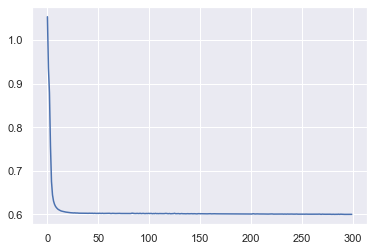

In [468]:
plt.plot(history.history['loss'])
plt.show()